Import the relevant python modules required for the example: xarray and matplotlib

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from SubRoutines.indexing import find_matching_index
from SubRoutines.plotting import set_up

Specify the file to read in. In this case we are reading LST derived from MODIS AQUA, the data has been process to L3 and therefore has been reprojected to a regular grid (0.25 degrees in this example): 

In [20]:
esacci_lst_025 = "Data/ESACCI-LST-L3C-LST-MODISA-0.25deg_1MONTHLY_DAY-20060701000000-fv3.00.nc"

Open file using xarray (xr), the file will be read into a dataset (ds) structure:

In [21]:
ds = xr.load_dataset(esacci_lst_025)

We can display the data within the dataset easily:

In [22]:
ds

<xarray.Dataset>
Dimensions:          (time: 1, lat: 720, lon: 1440, length_scale: 1, channel: 2)
Coordinates:
  * time             (time) datetime64[ns] 2006-07-01
  * lat              (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon              (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * channel          (channel) float32 11.0 12.0
Dimensions without coordinates: length_scale
Data variables:
    dtime            (time, lat, lon) timedelta64[ns] NaT NaT NaT ... NaT NaT
    satze            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    sataz            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    solze            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    solaz            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst              (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_uncertainty  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_ran      (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_loc_atm  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_loc_sfc  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_sys      (length_scale, lat, lon) float32 nan nan nan ... nan nan
Attributes: (12/41)
    title:                      ESA LST CCI land surface temperature data at ...
    institution:                University of Leicester
    source:                     ESA LST CCI MODISA L3C V3.00
    history:                    Created using software developed at Universit...
    references:                 https://climate.esa.int/en/projects/land-surf...
    tracking_id:                4d86dd7-ffa4-4c6a-8dca-21c2ba45f8d2
    ...                         ...
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    geospatial_lat_resolution:  0.25
    key_variables:              land_surface_temperature
    svn_version:                5771
    format_version:             CCI Data Standards v2.2

We can also plot the lst data directly (size and aspect are added here to make the image larger, but are not required):

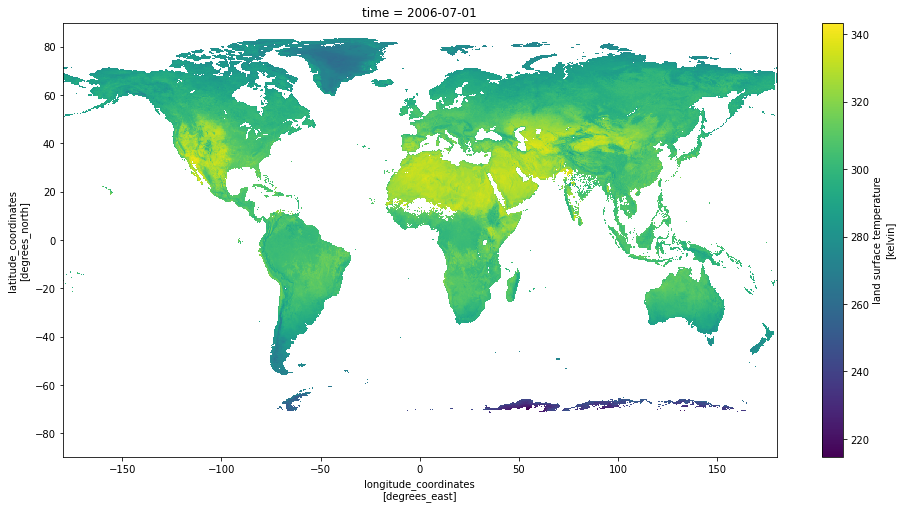

In [23]:
ds.lst.plot(aspect=2,size=8)

We can also look at the global distribution of LST:

''

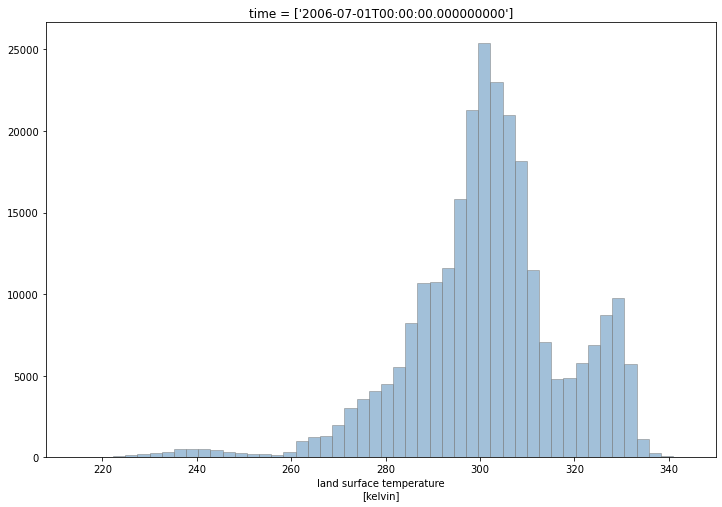

In [24]:
ds.lst.plot.hist(size=8,bins=50, alpha=0.5, color='steelblue',edgecolor='grey')
;

And we can look at specifc regions, first lets set our region of interest: 

In [25]:
lower_lon = 105.0
upper_lon = 145.0
lower_lat = 25.0
upper_lat = 65.0

Next we find the indexes in the dataset which bound this region:

In [26]:
lat_max_idx = find_matching_index(ds.lat.values,upper_lat)
lat_min_idx = find_matching_index(ds.lat.values,lower_lat)
lon_max_idx = find_matching_index(ds.lon.values,upper_lon)
lon_min_idx = find_matching_index(ds.lon.values,lower_lon)

Ready to go. First we use "slice" to cut our the region of interest for both the lat and lon determined by the indexes we just determined. Then the plotting code is updated to use this region:

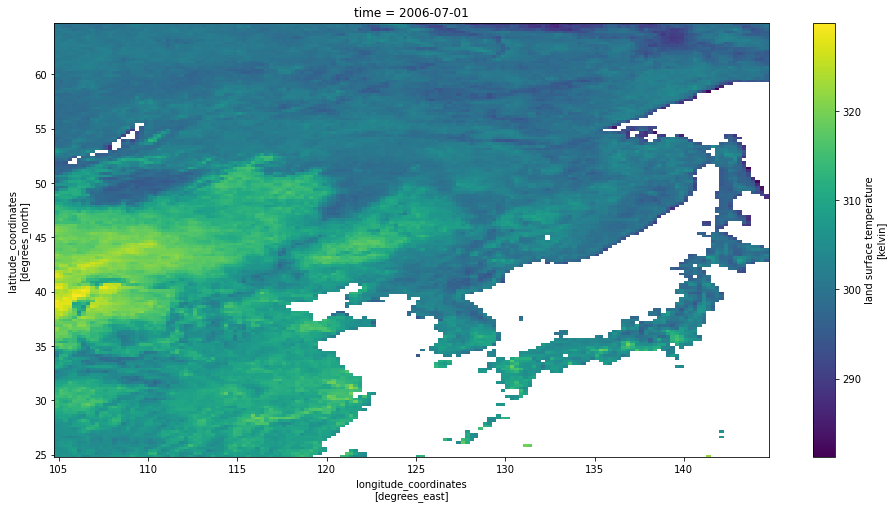

In [27]:
lat_region = slice(lat_min_idx, lat_max_idx)
lon_region = slice(lon_min_idx,lon_max_idx)
ds.lst.isel(lat=lat_region,lon=lon_region).plot(aspect=2,size=8)

We can also run for transects. Similar to the region subsetting above, we specify at latitute, then find the corresponding index in the array and plot all longitudes at that latitude:

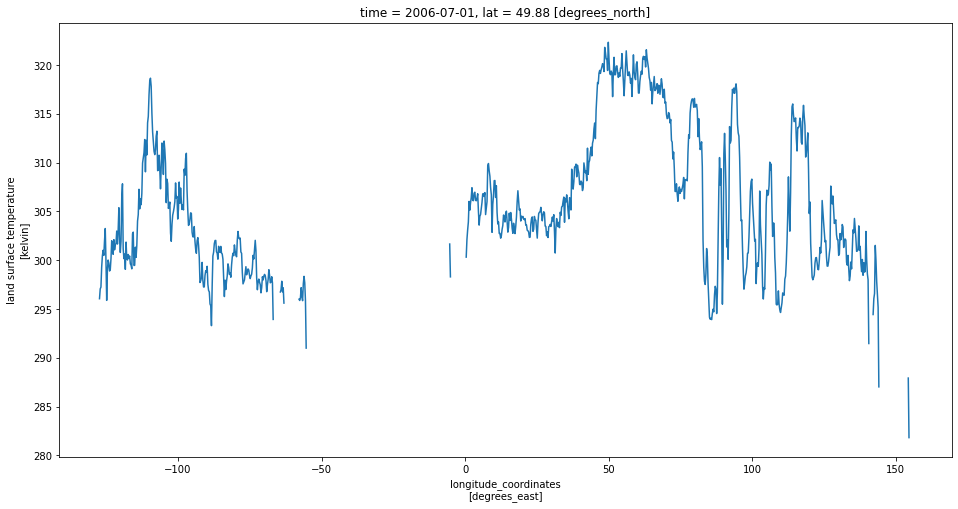

In [28]:
lat_transect = 50.0
lat_idx = find_matching_index(ds.lat.values, lat_transect)
ds.lst.isel(lat=lat_idx).plot(aspect=2,size=8)

We can also explore some of the other paramters provided with the LST CCI data by looking at another product. Here we will use some 0.01 degree MODIS AQUA data that has been regridded to a subset (lat: 40-->45, lon: 117-->122):

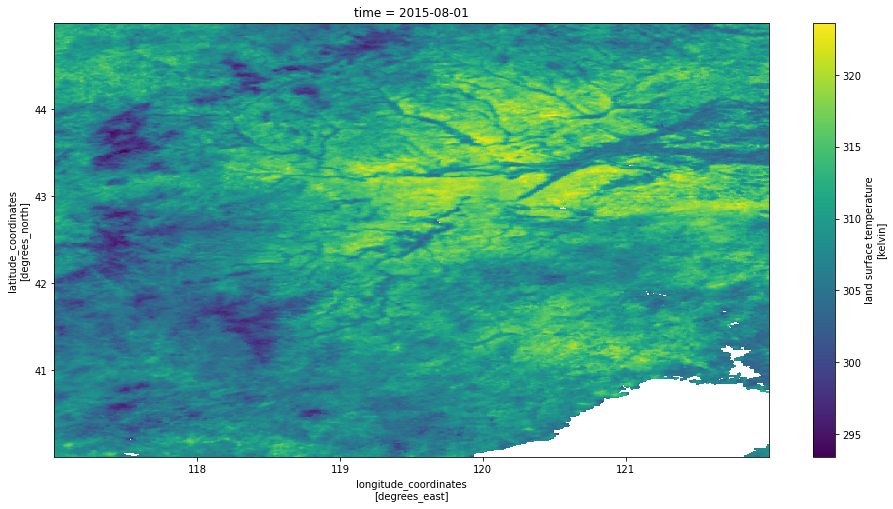

In [29]:
regridded_ds = xr.open_dataset("Data/ESACCI-LST-L3C-LST-MODISA-0.01deg_1MONTHLY_DAY-20220901103756-fv3.00.nc")
regridded_ds.lst.plot(aspect=2,size=8)

The data contains several variables that were not in the 0.25 degree data such as land cover classification (lcc):

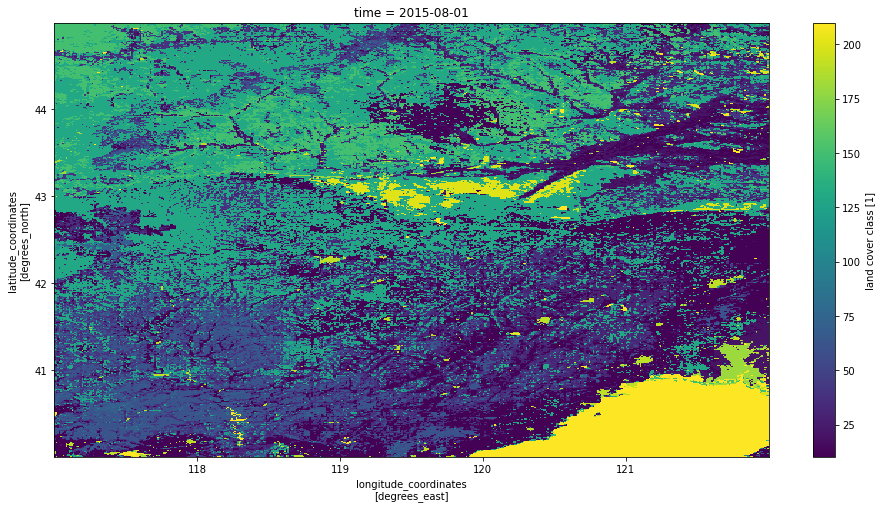

In [30]:
regridded_ds.lcc.plot(size=8,aspect=2)

We can inspect the corresponding values of these classes in the attributes:

In [31]:
regridded_ds.lcc.attrs

{'long_name': 'land cover class',
 'units': '1',
 'flag_meanings': 'cropland_rainfed cropland_rainfed_herbaceous_cover cropland_rainfed_tree_or_shrub_cover cropland_irrigated mosaic_cropland mosaic_natural_vegetation tree_broadleaved_evergreen_closed_to_open tree_broadleaved_deciduous_closed_to_open tree_broadleaved_deciduous_closed tree_broadleaved_deciduous_open tree_needleleaved_evergreen_closed_to_open tree_needleleaved_evergreen_closed tree_needleleaved_evergreen_open tree_needleleaved_deciduous_closed_to_open tree_needleleaved_deciduous_closed tree_needleleaved_deciduous_open tree_mixed mosaic_tree_and_shrub mosaic_herbaceous shrubland shrubland_evergreen shrubland_deciduous grassland lichens_and_mosses sparse_vegetation sparse_tree sparse_shrub sparse_herbaceous tree_cover_flooded_fresh_or_brakish_water tree_cover_flooded_saline_water shrub_or_herbaceous_cover_flooded urban Bare_areas_of_soil_types_not_contained_in_biomes_21_to_25 Unconsolidated_bare_areas_of_soil_types_not_cont

We can also inspect the distribution of these lccs:

<Figure size 864x288 with 0 Axes>

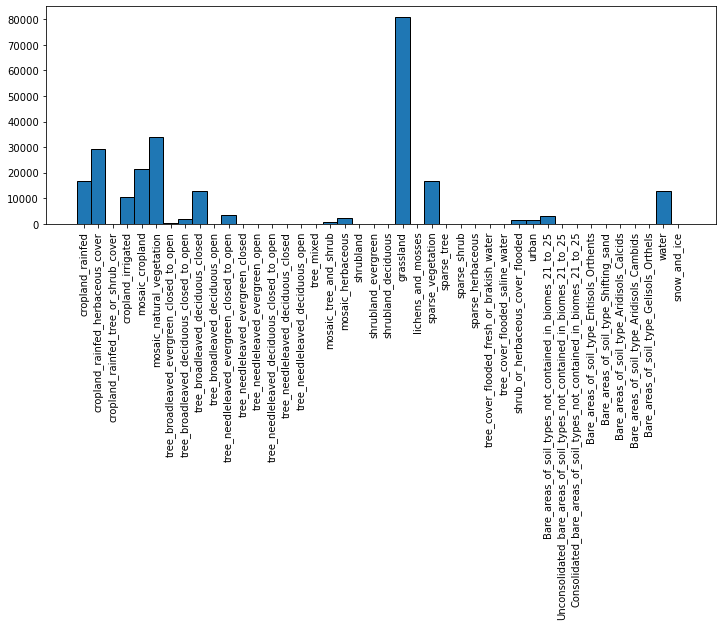

In [32]:
set_up(regridded_ds)

This can be correlated against LST to see the lcc distribution of temperature.

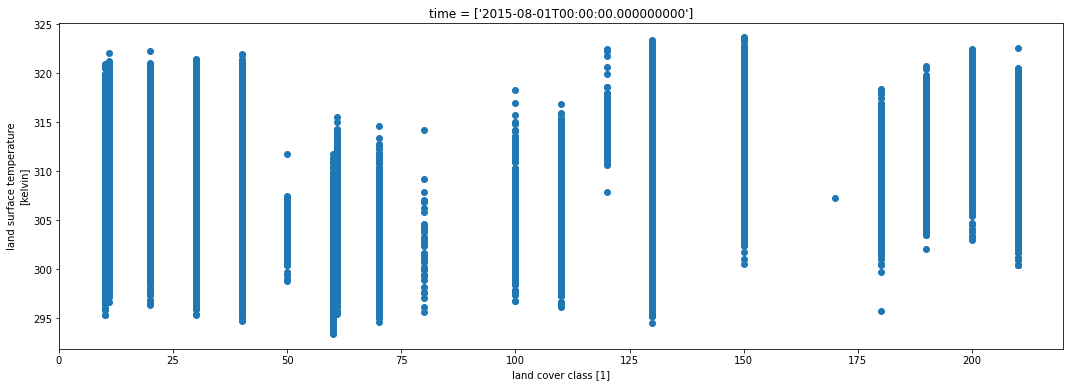

In [33]:
regridded_ds.plot.scatter(x="lcc",y="lst",size=6,aspect=3)